In [137]:
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [138]:
penguins = load_penguins()
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [139]:
attributeNames = np.asarray(penguins.columns) # Headers (attribute names)
print(penguins.shape)
print(attributeNames)

(344, 8)
['species' 'island' 'bill_length_mm' 'bill_depth_mm' 'flipper_length_mm'
 'body_mass_g' 'sex' 'year']


In [140]:
# Inspect the data
print(penguins.to_string())  # String representation of the dataframe

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     sex  year
0       Adelie  Torgersen            39.1           18.7              181.0       3750.0    male  2007
1       Adelie  Torgersen            39.5           17.4              186.0       3800.0  female  2007
2       Adelie  Torgersen            40.3           18.0              195.0       3250.0  female  2007
3       Adelie  Torgersen             NaN            NaN                NaN          NaN     NaN  2007
4       Adelie  Torgersen            36.7           19.3              193.0       3450.0  female  2007
5       Adelie  Torgersen            39.3           20.6              190.0       3650.0    male  2007
6       Adelie  Torgersen            38.9           17.8              181.0       3625.0  female  2007
7       Adelie  Torgersen            39.2           19.6              195.0       4675.0    male  2007
8       Adelie  Torgersen            34.1           18.1              193

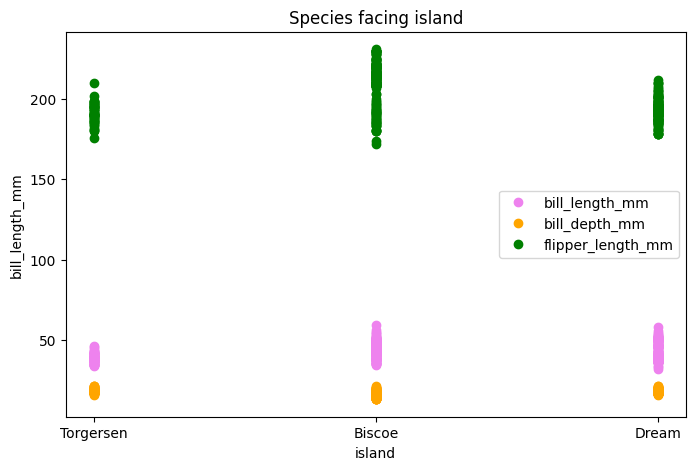

In [141]:
# Celia test 1
plt.figure(figsize=(8,5))
plt.title('Species facing island')
plt.xlabel(attributeNames[1])
plt.ylabel(attributeNames[2])
plt.plot(penguins[attributeNames[1]], penguins[attributeNames[2]], 'o', color='violet')
plt.plot(penguins[attributeNames[1]], penguins[attributeNames[3]], 'o', color='orange')
plt.plot(penguins[attributeNames[1]], penguins[attributeNames[4]], 'o', color='green')
plt.legend(attributeNames[2:5])
plt.show()


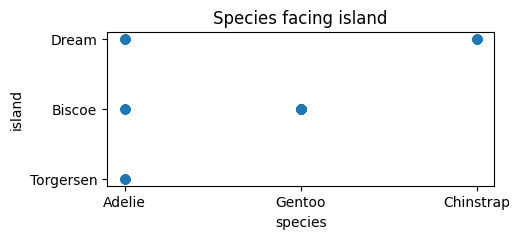

In [142]:
# Celia test species facing island
plt.figure(figsize=(5,2))
plt.title('Species facing island')
plt.xlabel(attributeNames[0])
plt.ylabel(attributeNames[1])
#make size of dots larger if larger number of observations have it
plt.plot(penguins[attributeNames[0]], penguins[attributeNames[1]], 'o')
plt.show()


# 1 - Preprocessing and transformations.

Only problem seems to be the Nans, those objects (rows) will now be deleted.

## 1.1 - Start removing Nans and making a visual inspection

(333, 8)
(344, 8)
       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     sex  year
0       Adelie  Torgersen            39.1           18.7              181.0       3750.0    male  2007
1       Adelie  Torgersen            39.5           17.4              186.0       3800.0  female  2007
2       Adelie  Torgersen            40.3           18.0              195.0       3250.0  female  2007
4       Adelie  Torgersen            36.7           19.3              193.0       3450.0  female  2007
5       Adelie  Torgersen            39.3           20.6              190.0       3650.0    male  2007
6       Adelie  Torgersen            38.9           17.8              181.0       3625.0  female  2007
7       Adelie  Torgersen            39.2           19.6              195.0       4675.0    male  2007
12      Adelie  Torgersen            41.1           17.6              182.0       3200.0  female  2007
13      Adelie  Torgersen            38.6           21.

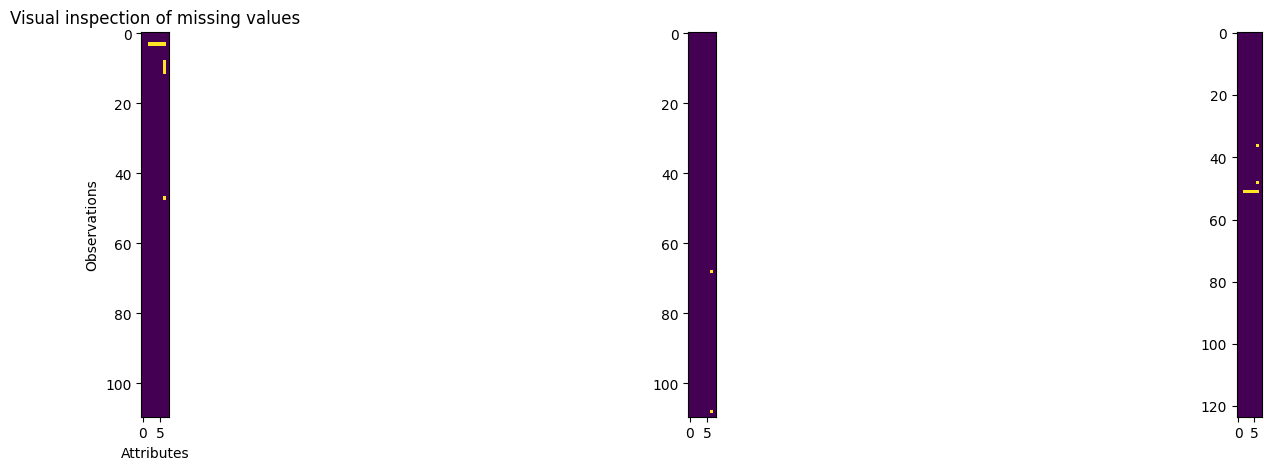

In [143]:
## Missing values - visual inspection

missing_idx=penguins.isnull()    # True if an element is missing (NaN)
obs_row_missing = np.sum(missing_idx, 1) > 0  # Axis 1 is rows!!
obs_drop_missing = penguins.iloc[np.logical_not(obs_row_missing).values,:] # Delete observations with missing values

print(obs_drop_missing.shape)
print(penguins.shape)


## Visual Inspection of Missing Values

print(obs_drop_missing.to_string())

# Another approach is to first investigate where the missing values are.
# A quick way to do this is to visually look at the missing_idx:
plt.subplots(1,3,figsize=(20,5))
plt.subplot(1,3,1)
plt.title('Visual inspection of missing values')
plt.imshow(missing_idx.iloc[:110,:])
plt.ylabel('Observations'); plt.xlabel('Attributes')
plt.subplot(1,3,2)
plt.imshow(missing_idx.iloc[110:220,:])
plt.subplot(1,3,3)
plt.imshow(missing_idx.iloc[220:,:])

plt.show()



penguins = obs_drop_missing # update penguins with no missing values

## 1.2 - Standarization of continuous variables.

In [144]:
# Standarize the data
X = np.matrix(penguins.iloc[:,2:6].values, dtype=float) # Convert pandas DataFrame to matrix

X = (X - X.mean(axis=0)) / X.std(axis=0) # Standardize X
penguins.iloc[:,2:6]= X    # Update penguins with standardized data

display(penguins.describe())
# Check that it worked -> mean approximately zero, std approximately 1
X[:,2:6].mean(axis=0)
X[:,2:6].std(axis=0)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,3.330000e+02,3.330000e+02,3.330000e+02,3.330000e+02,333.000000
mean,-3.499370e-15,-1.280257e-15,2.133762e-16,-1.280257e-16,2008.042042
std,1.001505e+00,1.001505e+00,1.001505e+00,1.001505e+00,0.812944
min,-2.177987e+00,-2.067291e+00,-2.069852e+00,-1.874435e+00,2007.000000
25%,-8.227879e-01,-7.958519e-01,-7.836512e-01,-8.172292e-01,2007.000000
50%,9.288742e-02,6.872642e-02,-2.834620e-01,-1.953432e-01,2008.000000
75%,8.437412e-01,7.807321e-01,8.598276e-01,7.063915e-01,2009.000000
max,2.858227e+00,2.204743e+00,2.146028e+00,2.603144e+00,2009.000000


matrix([[1., 1.]])

In [145]:
a=penguins[(penguins['species']=='Adelie') & (penguins['island']=='Torgersen')].count()[0]
b=penguins[(penguins['species']=='Adelie') & (penguins['island']=='Biscoe')].count()[0]
c=penguins[(penguins['species']=='Adelie') & (penguins['island']=='Dream')].count()[0]
print(f"Adelie:    {a} Torgersen , {b} Biscoe, {c} Dream")
a=penguins[(penguins['species']=='Gentoo')].count()[0] #Torgersen
b=penguins[(penguins['species']=='Chinstrap')].count()[0]
print(f"Gentoo:    {a}")
print(f"Chinstrap: {b}")

Adelie:    47 Torgersen , 44 Biscoe, 55 Dream
Gentoo:    119
Chinstrap: 68


C:\Users\jorge\AppData\Local\Temp\ipykernel_31136\3429528334.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a=penguins[(penguins['species']=='Adelie') & (penguins['island']=='Torgersen')].count()[0]
C:\Users\jorge\AppData\Local\Temp\ipykernel_31136\3429528334.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b=penguins[(penguins['species']=='Adelie') & (penguins['island']=='Biscoe')].count()[0]
C:\Users\jorge\AppData\Local\Temp\ipykernel_31136\3429528334.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consiste

# 1.3 - Drop years

In [146]:
penguins.drop(['year'], axis=1, inplace=True)
print(penguins.to_string())

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     sex
0       Adelie  Torgersen       -0.896042       0.780732          -1.426752    -0.568475    male
1       Adelie  Torgersen       -0.822788       0.119584          -1.069474    -0.506286  female
2       Adelie  Torgersen       -0.676280       0.424729          -0.426373    -1.190361  female
4       Adelie  Torgersen       -1.335566       1.085877          -0.569284    -0.941606  female
5       Adelie  Torgersen       -0.859415       1.747026          -0.783651    -0.692852    male
6       Adelie  Torgersen       -0.932669       0.323014          -1.426752    -0.723946  female
7       Adelie  Torgersen       -0.877728       1.238450          -0.426373     0.582014    male
12      Adelie  Torgersen       -0.529772       0.221299          -1.355296    -1.252549  female
13      Adelie  Torgersen       -0.987609       2.052171          -0.712196    -0.506286    male
14      Adelie  Torgersen     

## 1.3 - One hot encoding
May automatise.

In [147]:
## One-out-of-K encoding 

# Of 'species' attribute
"""   # extract unique labels and assign number
species = np.asarray(penguins['species']) # attribute species for each penguin
speciesNames = np.unique(species) # unique species names
speciesDict = dict(zip(speciesNames,range(len(speciesNames))))
species_num = np.array([speciesDict[value] for value in species]) 
  # Preallocate memory, then extract data to matrix X
Ksp=len(speciesNames)
species_encoding = np.zeros((species.size, Ksp),dtype=int)
species_encoding[np.arange(species.size), species_num] = 1 

X=penguins.drop(['species'],axis=1).values
X= np.concatenate((species_encoding,X),axis=1)  # for interpretations, see speciesDict """

Ksp = 0
X = penguins.values

# Change species to numbers and set it as first column
species = np.asarray(penguins['species'])  # attribute species for each penguin
speciesNames = np.unique(species)          # unique species names
speciesDict = dict(zip(speciesNames, range(len(speciesNames))))
species_num = np.matrix([speciesDict[value] for value in species]) 

X = penguins.drop(['species'], axis=1).values
X = np.concatenate((species_num.T, X), axis=1) 



## 'island' attribute
# extract unique labels and assign number
islands = np.asarray(penguins['island'])   # attribute species for each penguin
islandNames = np.unique(islands)         # unique species names
islandDict = dict(zip(islandNames, range(len(islandNames)))) # dictionary mapping species to number
island_num = np.array([islandDict[value] for value in islands]) 

# Preallocate memory, then extract data to matrix X
Kis = len(islandNames)                  # number of species
island_encoding = np.zeros((islands.size, Kis),dtype=int) # Preallocate memory
island_encoding[np.arange(islands.size), island_num] = 1  # Fill with ones

X=np.concatenate((X[:,:Ksp+1],island_encoding,X[:,Ksp+2:]),axis=1)  



##'sex' attribute --> don't need 2 variables, since let's do: 0-female, 1-male (Binarized)
sexes = np.asarray(penguins['sex'])
sexNames = np.unique(sexes)
sexDict = dict(zip(sexNames, range(len(sexNames))))
sex_num = np.matrix([sexDict[value] for value in sexes]) # attribute species for each penguin

X = np.concatenate((X[:,:-1], sex_num.T),axis=1)  # for interpretations, see sexDict X[:,-1]

In [148]:
print(sexDict)
print(islandDict)
print(speciesDict)
penguins = pd.DataFrame(X)
penguins

{'female': 0, 'male': 1}
{'Biscoe': 0, 'Dream': 1, 'Torgersen': 2}
{'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}


,0,1,2,3,4,5,6,7,8
0,0,0,0,1,-0.896042,0.780732,-1.426752,-0.568475,1
1,0,0,0,1,-0.822788,0.119584,-1.069474,-0.506286,0
2,0,0,0,1,-0.67628,0.424729,-0.426373,-1.190361,0
3,0,0,0,1,-1.335566,1.085877,-0.569284,-0.941606,0
4,0,0,0,1,-0.859415,1.747026,-0.783651,-0.692852,1
...,...,...,...,...,...,...,...,...,...
328,1,0,1,0,2.162314,1.340165,0.431094,-0.257532,1
329,1,0,1,0,-0.090248,0.475587,0.073816,-1.003795,0
330,1,0,1,0,1.026876,0.526444,-0.569284,-0.53738,1
331,1,0,1,0,1.246638,0.933305,0.645461,-0.133155,1


## 1.4. Basic statistics

## 2 Data visualization based on a PCA

      As the data has being already standarized, the PCA can be done diretly

In [163]:
# Separate the data into attributes X and target class y
X_pca = penguins.iloc[:,1:].values
y_pca = penguins.iloc[:,0].values

# Get the name for attributes and target class
attributeNames_PCA = ['Biscoe Island', 'Dream Island', 'Torgensen Island', 'Bill length', 'Bill Depth', 'Fliper Length', 'Body Mass','Sex']
targetName_PCA = ['Species']

# Perform PCA with 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_pca)

# Convine the principal components with the target class
data_PCA_all = np.transpose([principalComponents[:,0], principalComponents[:,1], y_pca])

# Create a new dataframe with the principal components
penguins_pca = pd.DataFrame(data_PCA_all, columns=['Principal Component 1', 'Principal Component 2', 'Target Data'])


In [150]:
print(penguins_pca.to_string())

    Principal Component 1 Principal Component 2 Target Data
0               -1.863905              0.096355           0
1               -1.409215             -0.647807           0
2               -1.476012             -0.409761           0
3               -1.960722             -0.293145           0
4               -1.936538              0.791985           0
5               -1.852084             -0.607097           0
6               -0.859624               0.59139           0
7               -1.886072             -0.513969           0
8               -1.970619              0.955621           0
9               -1.579713              0.625358           0
10              -1.820272             -0.815015           0
11              -1.666226             -0.192207           0
12              -0.861754              1.286801           0
13              -2.401018             -0.881089           0
14              -1.071366              1.865401           0
15              -2.196481             -0

C:\Users\jorge\AppData\Local\Temp\ipykernel_31136\1205459893.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(principalComponents[indices, 0], principalComponents[indices, 1], c=cmap(i), label=label)


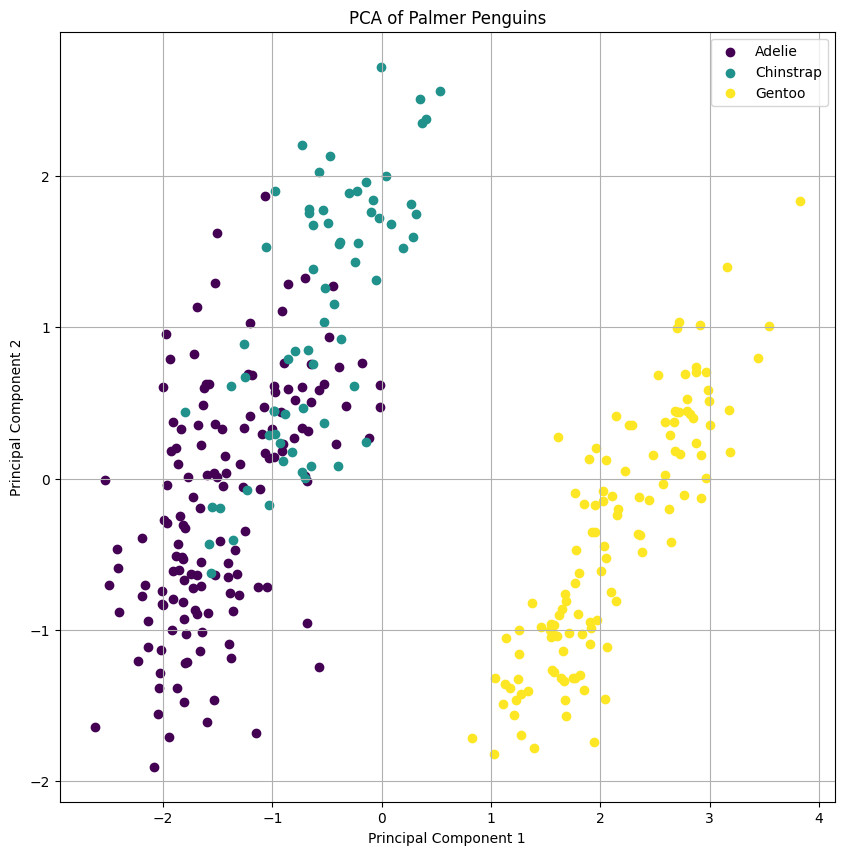

In [151]:

# Assuming y_pca contains the labels for the different classes
unique_labels = list(set(y_pca))
num_labels = len(unique_labels)
cmap = plt.get_cmap('viridis', num_labels)

# Create a colormap with a color for each unique label
#label_colors = ListedColormap(cmap.colors)

# Plot the pca with a legend
plt.figure(figsize=(10, 10))
plt.grid()

# Create scatter plots for each unique label
for i, label in enumerate(unique_labels):
    indices = y_pca == label
    plt.scatter(principalComponents[indices, 0], principalComponents[indices, 1], c=cmap(i), label=label)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Palmer Penguins')

# Show the legend with all entries
plt.legend(['Adelie', 'Chinstrap', 'Gentoo'])

plt.show()


C:\Users\jorge\AppData\Local\Temp\ipykernel_31136\1205459893.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(principalComponents[indices, 0], principalComponents[indices, 1], c=cmap(i), label=label)


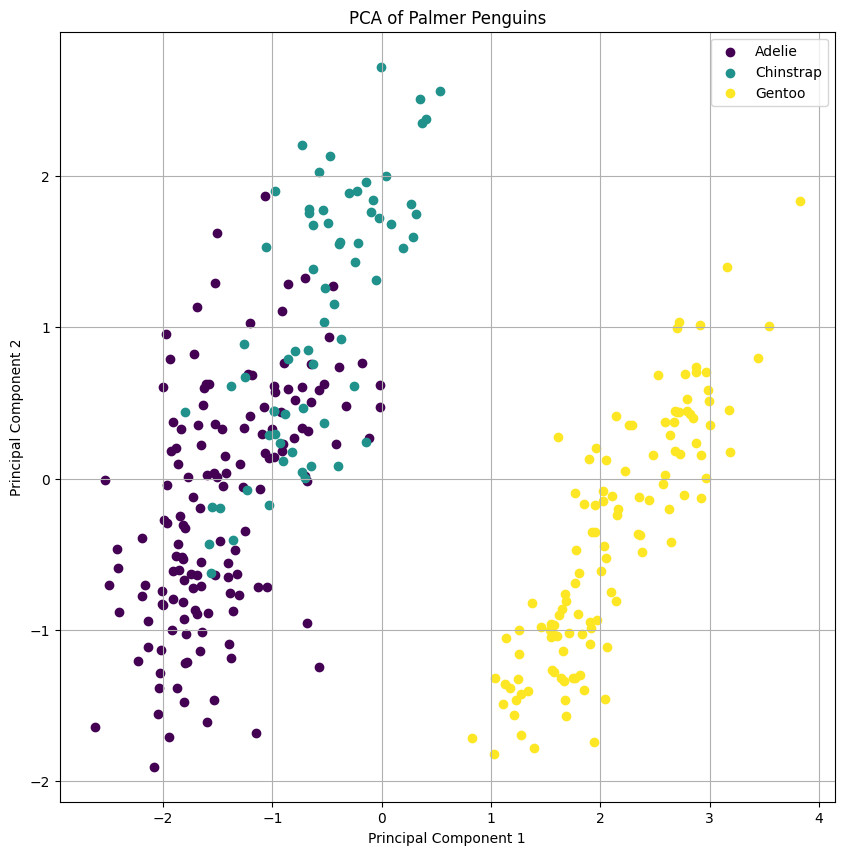

In [152]:

# Assuming y_pca contains the labels for the different classes
unique_labels = list(set(y_pca))
num_labels = len(unique_labels)
cmap = plt.get_cmap('viridis', num_labels)

# Create a colormap with a color for each unique label
#label_colors = ListedColormap(cmap.colors)

# Plot the pca with a legend
plt.figure(figsize=(10, 10))
plt.grid()

# Create scatter plots for each unique label
for i, label in enumerate(unique_labels):
    indices = y_pca == label
    plt.scatter(principalComponents[indices, 0], principalComponents[indices, 1], c=cmap(i), label=label)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Palmer Penguins')

# Show the legend with all entries
plt.legend(['Adelie', 'Chinstrap', 'Gentoo'])

plt.show()


C:\Users\jorge\AppData\Local\Temp\ipykernel_31136\727396917.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(principalComponents[indices, 0], principalComponents[indices, 1], c=cmap(i), label=label)


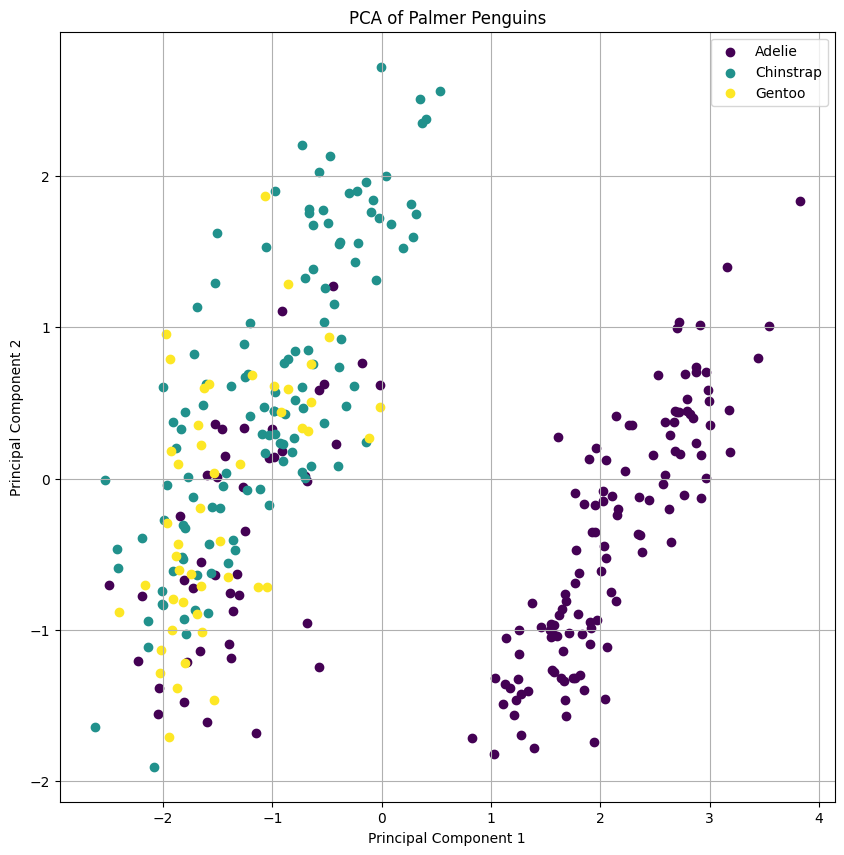

In [168]:

# Assuming y_pca contains the labels for the different classes
unique_labels = list(set(island_num))
num_labels = len(unique_labels)
cmap = plt.get_cmap('viridis', num_labels)

# Create a colormap with a color for each unique label
#label_colors = ListedColormap(cmap.colors)

# Plot the pca with a legend
plt.figure(figsize=(10, 10))
plt.grid()

# Create scatter plots for each unique label
for i, label in enumerate(unique_labels):
    indices = island_num == label
    plt.scatter(principalComponents[indices, 0], principalComponents[indices, 1], c=cmap(i), label=label)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Palmer Penguins')

# Show the legend with all entries
plt.legend(['Adelie', 'Chinstrap', 'Gentoo'])

plt.show()

TypeError: unhashable type: 'matrix'

How much variance does the principal components represent

In [154]:
# Explained variance of the two principal components
print(sum(pca.explained_variance_ratio_))


0.8009819933840976


DO THE PARETO CHART TO SEE HOW THE PRINCIPAL COMPONETS EXPLAIN THE VARIANCE

In [155]:
# Separate the data into attributes X and target class y
X_pca = penguins.iloc[:,1:].values
y_pca = penguins.iloc[:,0].values

# Perform PCA with 8 components
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(X_pca)


[6.02513912e-01 1.98468081e-01 9.96108772e-02 3.22495621e-02
 3.05653732e-02 2.19877676e-02 1.46044265e-02 4.87075621e-31]


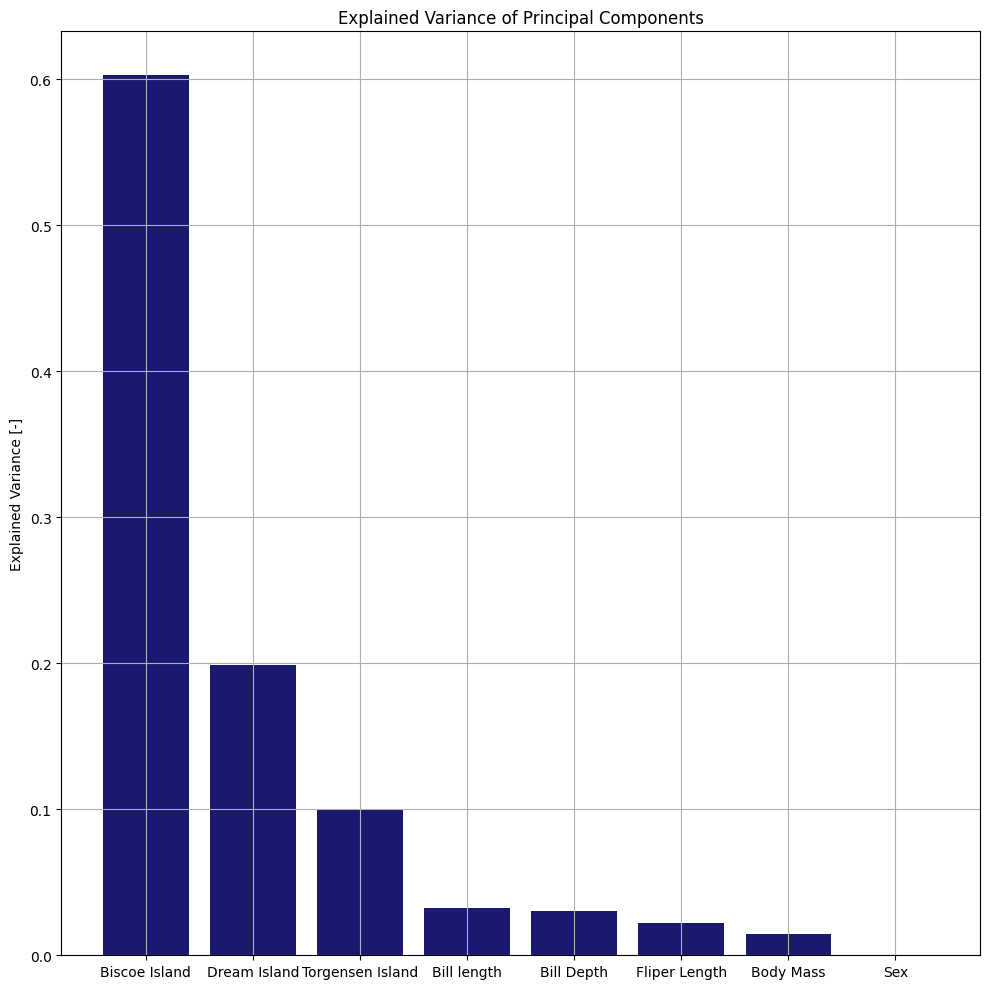

In [156]:
# Weight of the principal components in a bar diagram
print(pca.explained_variance_ratio_)

# Plot the bar diagram
plt.figure(figsize=(10, 10))
plt.grid()
plt.bar(attributeNames_PCA, pca.explained_variance_ratio_, color ='#191970')
plt.ylabel('Explained Variance [-]')
plt.title('Explained Variance of Principal Components')
# Adjust spacing between subplots
plt.tight_layout()
plt.show()

[0.60251391 0.80098199 0.90059287 0.93284243 0.96340781 0.98539557
 1.         1.        ]


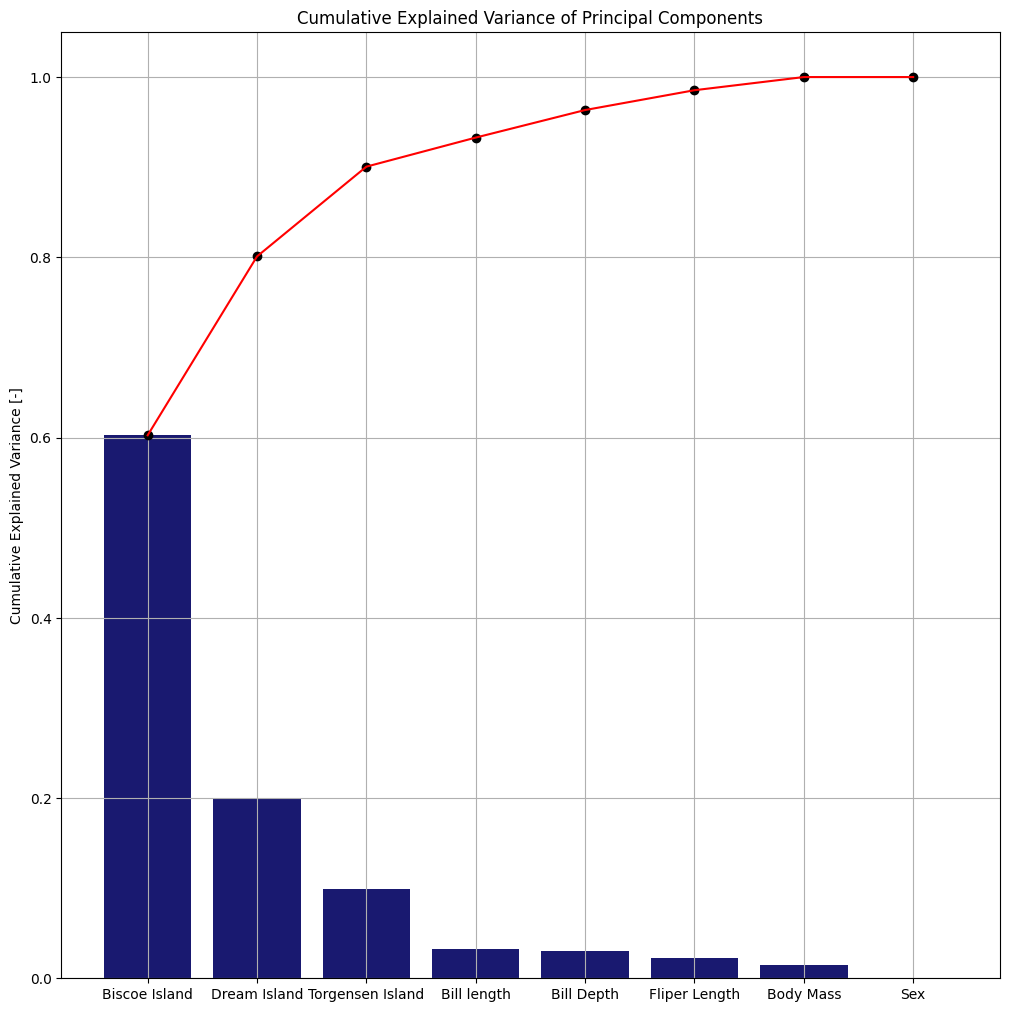

In [157]:
# Comulative explained variance plot

# Calculate the cumulative explained variance
cum_exp_var = np.cumsum(pca.explained_variance_ratio_)
print(cum_exp_var)


# Plot the cumulative explained variance
plt.figure(figsize=(10, 10))
plt.grid()
plt.bar(attributeNames_PCA, pca.explained_variance_ratio_, color ='#191970')
plt.plot(cum_exp_var, 'ok')
plt.plot(cum_exp_var, color='red')
plt.tight_layout()
plt.ylabel('Cumulative Explained Variance [-]')
plt.title('Cumulative Explained Variance of Principal Components')
plt.show()


In [158]:
# Get the loadings of each atribute for the first 3 principal componets

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'], index=attributeNames_PCA)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Biscoe Island,0.199804,-0.202471,-0.176223,-0.297530,0.601909,0.319233,-0.044353,-5.773503e-01
Dream Island,-0.129256,0.224706,0.356767,0.686759,0.014497,-0.008838,0.016075,-5.773503e-01
Torgensen Island,-0.070549,-0.022235,-0.180544,-0.389228,-0.616406,-0.310394,0.028278,-5.773503e-01
Bill length,0.422291,0.546034,0.580580,-0.405125,0.078768,-0.116637,0.050084,-3.053113e-16
Bill Depth,-0.393540,0.686972,-0.380827,-0.102795,0.017594,0.380272,0.269598,0.000000e+00
Fliper Length,0.558248,0.040274,-0.116076,0.175099,-0.462207,0.615728,-0.223266,4.996004e-16
Body Mass,0.537352,0.113261,-0.442738,0.274736,0.109350,-0.387511,0.514592,-3.330669e-16
Sex,0.069299,0.351404,-0.342743,0.086641,0.159474,-0.337892,-0.779186,-2.298509e-17


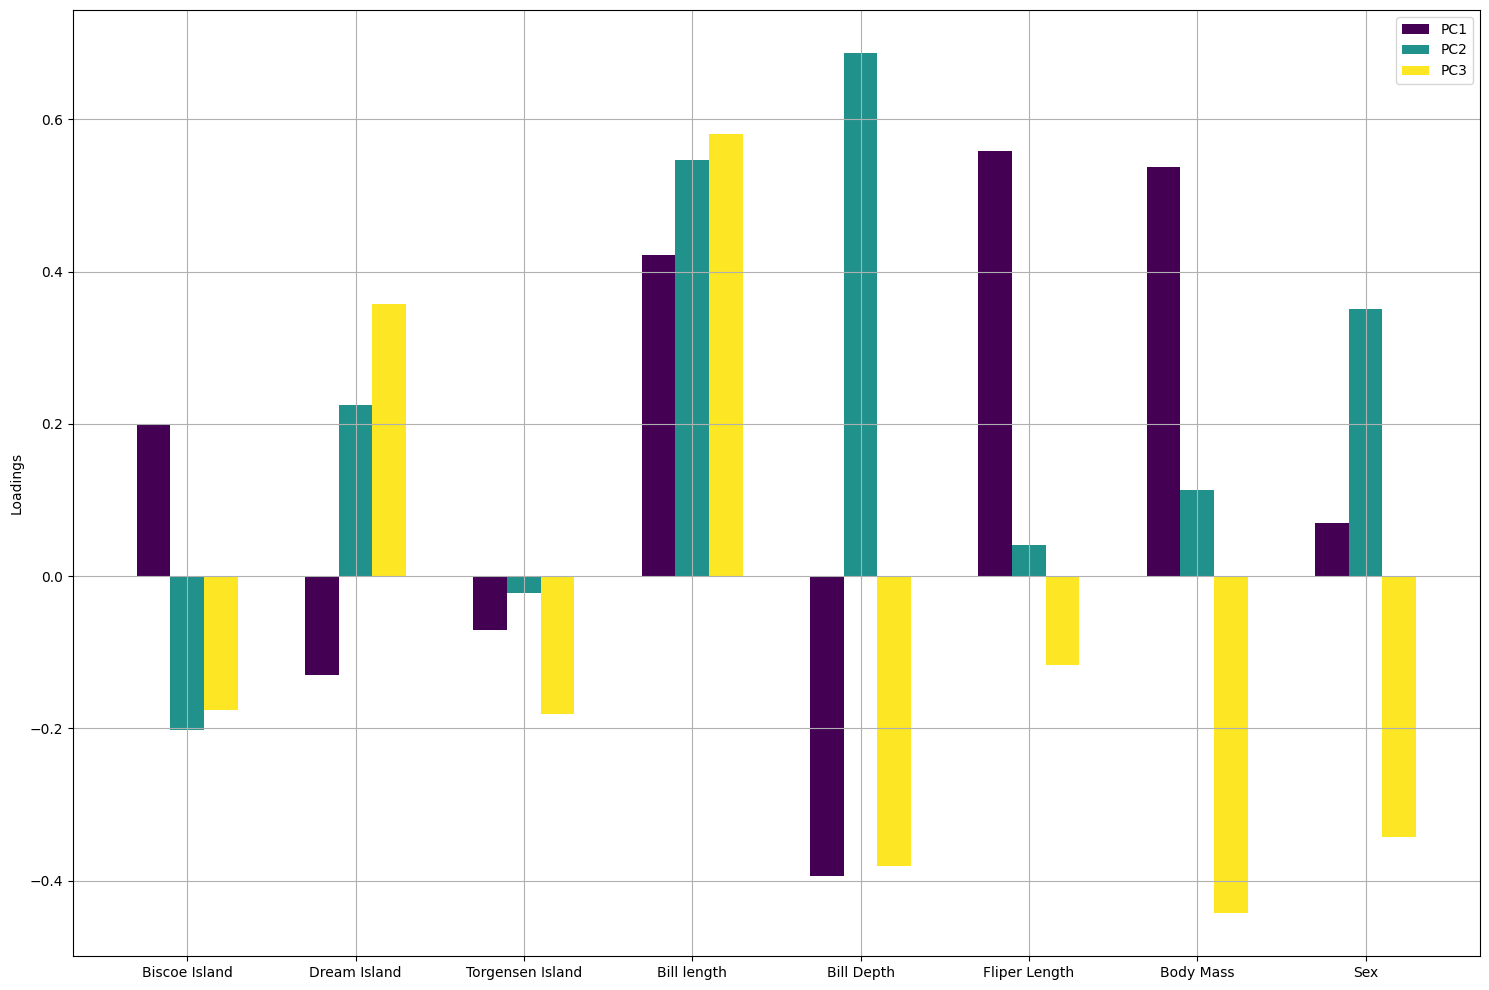

In [159]:
# Number of principal components to plot (first three)
num_pcs = 3

# Set the width of each bar
bar_width = 0.2

# Generate x-coordinates for the bars
x = np.arange(len(attributeNames_PCA))

# Define a color map
cmap = plt.get_cmap('viridis', num_labels)

# Make the plot
plt.figure(figsize=(15, 10))
plt.grid()

# Loop through each principal component and plot its bars
for i, (pc, values) in enumerate(loadings.items()):
    if i >= num_pcs:
        break  # Only plot the first three principal components
    plt.bar(x + i * bar_width, values, width=bar_width, label=pc, color=cmap(i))

# Set x-axis labels
plt.xticks(x + bar_width * (num_pcs - 1) / 2, attributeNames_PCA)

plt.ylabel('Loadings')

plt.tight_layout()

# Add a legend
plt.legend()

# Show the plot
plt.show()


## REPEAT PCA WIITHOUT CONSIDERING TORGENSEN ISLAND

In [160]:
# Separate the data into attributes X and target class y
X_pca =penguins.iloc[:, [1, 2, 3, 5, 6, 7, 8]]
y_pca = penguins.iloc[:,0].values

# Get the name for attributes and target class
attributeNames_PCA2 = ['Biscoe Island', 'Dream Island', 'Bill length', 'Bill Depth', 'Fliper Length', 'Body Mass','Sex']
targetName_PCA2 = ['Species']

# Perform PCA with 2 components
pca = PCA(n_components=2)
principalComponents2 = pca.fit_transform(X_pca)

# Convine the principal components with the target class
data_PCA_all = np.transpose([principalComponents2[:,0], principalComponents2[:,1], y_pca])

# Create a new dataframe with the principal components
penguins_pca2 = pd.DataFrame(data_PCA_all, columns=['Principal Component 1', 'Principal Component 2', 'Target Data'])


c:\Users\jorge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\jorge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\jorge\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [161]:
print(penguins_pca2.to_string())

    Principal Component 1 Principal Component 2 Target Data
0               -1.627813              0.304146           0
1               -1.114011             -0.564516           0
2               -1.271979             -0.477281           0
3               -1.528784              0.073417           0
4               -1.779598              1.099264           0
5               -1.547137             -0.582995           0
6               -0.594118              1.322946           0
7                -1.75987             -0.855089           0
8               -1.775696              1.412696           0
9               -1.027349              1.787501           0
10              -1.324616             -0.482359           0
11              -1.371579             -0.006257           0
12              -0.901229              1.673885           0
13              -1.780056             -0.464411           0
14              -1.436083              1.772179           0
15              -1.819616             -0

C:\Users\jorge\AppData\Local\Temp\ipykernel_31136\897567173.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(principalComponents2[indices, 0], principalComponents2[indices, 1], c=cmap(i), label=label)


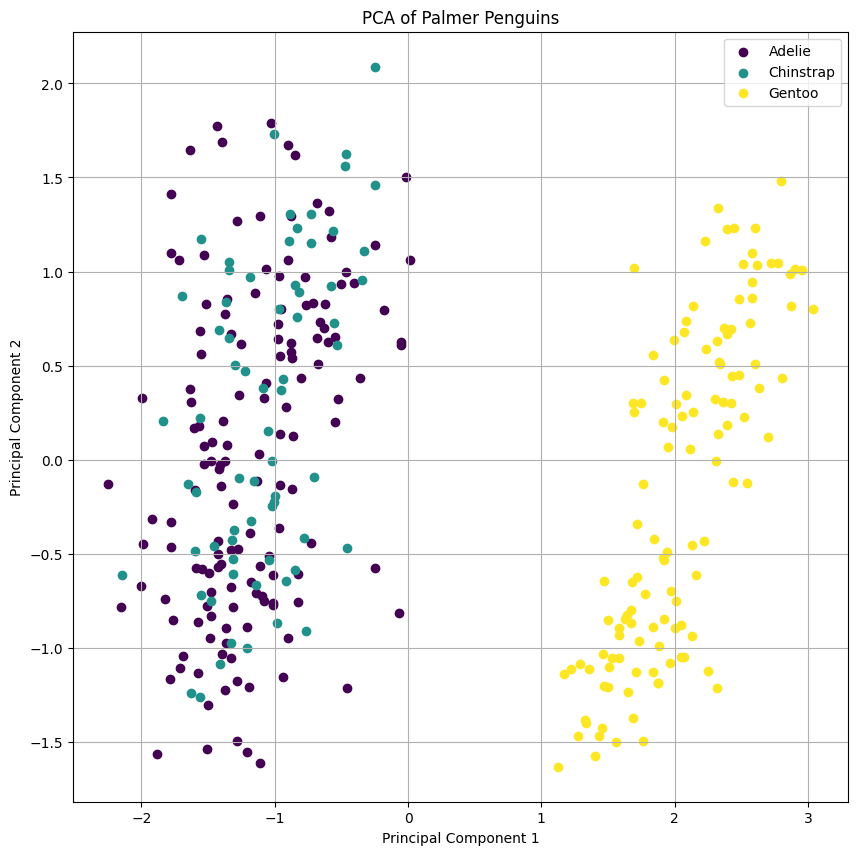

In [162]:

# Assuming y_pca contains the labels for the different classes
unique_labels = list(set(y_pca))
num_labels = len(unique_labels)
cmap = plt.get_cmap('viridis', num_labels)

# Create a colormap with a color for each unique label
#label_colors = ListedColormap(cmap.colors)

# Plot the pca with a legend
plt.figure(figsize=(10, 10))
plt.grid()

# Create scatter plots for each unique label
for i, label in enumerate(unique_labels):
    indices = y_pca == label
    plt.scatter(principalComponents2[indices, 0], principalComponents2[indices, 1], c=cmap(i), label=label)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Palmer Penguins')

# Show the legend with all entries
plt.legend(['Adelie', 'Chinstrap', 'Gentoo'])

plt.show()
